##  Aarti Sopan Navale

## THE SPARKS FOUNDATION

## GRIP MAY2021

## Task-1: Predict the percentage of an student based on the no. of study hours.

## Prediction using Supervised Machine Learning

### 1. Importing libraries

In [1]:
#Importing required libraries
import pandas as pd   #For handling dataset
import numpy as np    #For Numerical Calculations
import matplotlib.pyplot as plt  # For Graphical Visualizations 
%matplotlib inline
import seaborn as sns  # For data visualization

### 2. Reading Dataset

In [2]:
# Reading data from link
url =r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 3. Data Visualization

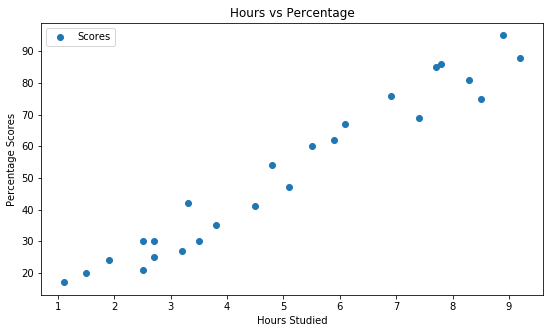

In [8]:
# Plotting the graph to see the relation and distribution of datapoints.

df.plot(x="Hours", y="Scores",figsize=(9,5),style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

from the above graphs we can see that there is positive linear relation between the no. of hours studied and percentage scores

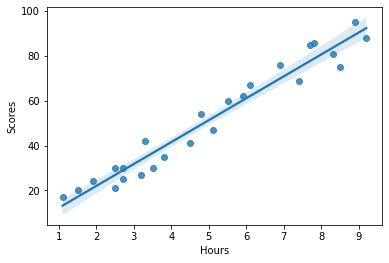

In [9]:
sns.regplot(x="Hours",y="Scores",data=df)

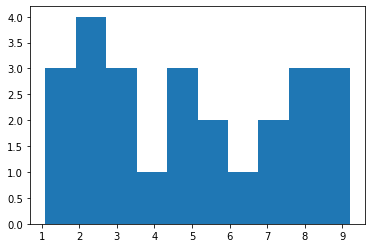

In [10]:
# Distrubution of Hours data
plt.hist(x="Hours",data=df)
plt.show()

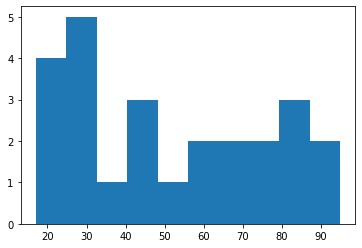

In [11]:
# Distrubution of Scores data

plt.hist(x="Scores",data=df)
plt.show()

### 4. Data Preparation

Dividing the dataset into input(attribute) and output(label)

In [12]:
X = df.iloc[:, :-1].values   
y = df.iloc[:, 1].values  

Split this data into train and test data using train_test_split() method from the scikit learn library.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### 5. Model training 

We have to train our data using linear regression algorithm and check the values for test data 

In [15]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

plot the regression line in the scatter plot

In [16]:
r_line= lr.coef_*X+lr.intercept_  # coefficients and intercepts of data points

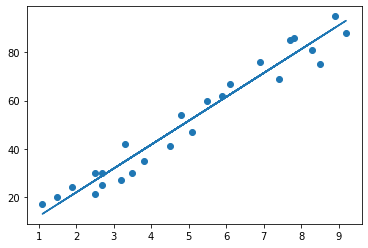

In [17]:
plt.scatter(X,y)
plt.plot(X,r_line)

### 6. Making Prediction

we have done with model training , now we have to make some predictions

In [18]:
y_pred =lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Compare actuaal values with predicted values

In [19]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [20]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
#score for test data
accuracy=lr.score(x_test, y_test)   
print("Accuracy:",accuracy*100)

Accuracy: 94.54906892105356


In [22]:
# we can test for any input
# here we are calculating the score for 9.25 studied hrs
hours=[[9.25]]
pred = lr.predict(hours)
pred

array([93.69173249])

#### For 9.25 studied hours, score will be 93.69 percentage

### 7. Model Evaluation

In this step we have to evaluate performance of algorithm. We can evaluate by calculating mean squared error or
mean absolute error or many other metrices.

In [23]:
# find error in prediction-- between actual value and predicted value

Mean Absolute Error

In [24]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",MAE)

Mean Absolute Error:  4.183859899002975


Mean Squared Error

In [25]:
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  21.5987693072174


In [26]:
# error is less that means our model is quite good

### 8. Creating Pickle File

In [27]:
# saving the model to the local file system
import pickle
filename = 'task1.pickle'
pickle.dump(lr, open(filename, 'wb'))

# Thank You!!